## Broad classification:

1. **Supervised Techniques**: These techniques can be used for labeled data, and are used to identify the relevant features for increasing the efficiency of supervised models like classification and regression. e.g. (chi2, Information Gain)
   1. **Continous Target** - When data is in Continous pattern we can use ExtraTreeRegressor() similar to ExtraTreeClassifier() and cannot use other classification methods.
   2. **Labelled Data** - When Target data is in Descrete pattern We use following methods.

2. **Unsupervised Techniques**: These techniques can be used for unlabeled data. e.g. (Varience threshold, Correlation coefficient)


## Classification based on taxanomy:

1. Filter methods - (Univariate Statistical Methods)
     1. **Chi-square Test**
     2. **Correlation Coefficient**
     3. **Variance Threshold**
     3. **Information Gain**
     4. Fisher’s Score
     5. Mean Absolute Difference (MAD)
     6. Dispersion ratio

2. Wrapper methods
     1. **Forward Feature Selection**
     2. **Backward Feature Elimination**
     3. **Exhaustive Feature Selection**
     4. Recursive Feature Elimination
3. Embedded methods
     1. LASSO Regularization (L1)
     2. Random Forest Importance
4. Hybrid methods


### Difference between Filter and Wrapper methods
The main differences between the filter and wrapper methods for feature selection are:

- Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
- Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
- Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.
- Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
- Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

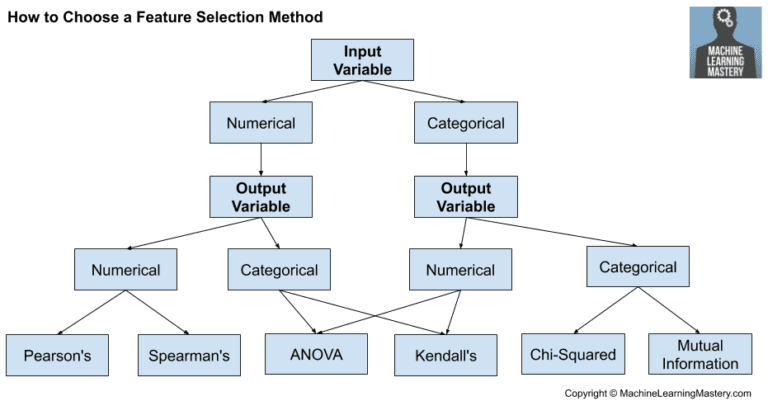

### 1. Numerical Input, Numerical Output
This is a regression predictive modeling problem with numerical input variables.

The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.

1. Pearson’s correlation coefficient (linear).
2. Spearman’s rank coefficient (nonlinear)

### 2. Numerical Input, Categorical Output
This is a classification predictive modeling problem with numerical input variables.

This might be the most common example of a classification problem,

Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

1. ANOVA correlation coefficient (linear).
2. Kendall’s rank coefficient (nonlinear).
Kendall does assume that the categorical variable is ordinal.

### 3. Categorical Input, Numerical Output
This is a regression predictive modeling problem with categorical input variables.

This is a strange example of a regression problem (e.g. you would not encounter it often).

Nevertheless, you can use the same “Numerical Input, Categorical Output” methods (described above), but in reverse.

### 4. Categorical Input, Categorical Output
This is a classification predictive modeling problem with categorical input variables.

The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

1. Chi-Squared test (contingency tables).
2. Mutual Information.
In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.


## Tips and Tricks for Feature Selection
This section provides some additional considerations when using filter-based feature selection.

### 1. Correlation Statistics
The scikit-learn library provides an implementation of most of the useful statistical measures.

For example:

1. Pearson’s Correlation Coefficient: f_regression()
2. ANOVA: f_classif()
3. Chi-Squared: chi2()
4. Mutual Information: mutual_info_classif() and mutual_info_regression()
5. Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).

### 2. Selection Method
The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

Two of the more popular methods include:

1. Select the top k variables: SelectKBest
2. Select the top percentile variables: SelectPercentile
I often use SelectKBest myself.

### 3. Transform Variables
Consider transforming the variables in order to access different statistical methods.

For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out.

You can also make a numerical variable discrete (e.g. bins); try categorical-based measures.

Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

In [1]:
# Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Data

df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/mobile_dataset.csv')
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


# 1. Filter Methods (Univarient Selection) - 

# 1.1 Chi - Square test 

- **KBest** is used to select best K number of features depending upon score function

- **chi2** is used as score function for KBest

chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

We find out the chi2 score for each of the feature from dataset with respect to target and top K number of features are selected, which have highest chi2 scores

### 1. SelectPercentile with chi2

In [2]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

x = df.iloc[:, :-1]
y = df["price_range"]

select_feature = SelectPercentile(score_func = chi2, percentile=20)

features = select_feature.fit(x, y)

x.columns[features.get_support()]

Index(['battery_power', 'px_height', 'px_width', 'ram'], dtype='object')

### 2. SelectKBest with chi2

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = df.iloc[:, :-1]
y = df["price_range"]

select_feature = SelectKBest(score_func = chi2, k=20)

features = select_feature.fit(x, y)

features.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [4]:
features_df = pd.DataFrame(x.columns, columns=["Features"])
scores_df = pd.DataFrame(features.scores_, columns=["Scores"])

feature_scores_df = pd.concat([features_df, scores_df], axis=1)

feature_scores_df.sort_values(by="Scores", ascending=False)

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [5]:
feature_scores_df.nlargest(10, "Scores")

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Feature importance

It gives the score for each feature and depending on highest scores Features are selected.

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()

model.fit(x,y)

ExtraTreesClassifier()

In [7]:
model.feature_importances_

array([0.06090923, 0.02004683, 0.03258118, 0.01970548, 0.03332561,
       0.01788824, 0.03549059, 0.03386229, 0.0362563 , 0.03370931,
       0.03296029, 0.04682465, 0.04849938, 0.39254875, 0.03370223,
       0.03415427, 0.03490503, 0.01462372, 0.01844179, 0.01956484])

<AxesSubplot:>

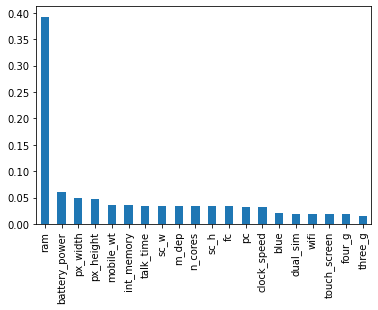

In [8]:
feature_scores_df = pd.Series(model.feature_importances_, index=x.columns)
feature_scores_df.sort_values(ascending=False).plot(kind='bar')

# 1.2 Correlation Coefficient

- Correlation coeffiecient measures the linear relationship between two features, hence with the help of linear relationship we can get the value of one feature from other.

- While making model we need only one feature from them as value of other can be predicted by first alone, and second one doesn't add any information.

- Negative correlation means features are in indirect propertion so we need those features and we keep it

- We use Pearson's correlation coefficient.

- scikitlearn does not provide any way to do it so we simply plot the heatmap of features and features which are correlated above threshold value are simply dropped,


**One should not use target variable for consideration of correlation**

In [9]:
cor = df.corr()

<AxesSubplot:>

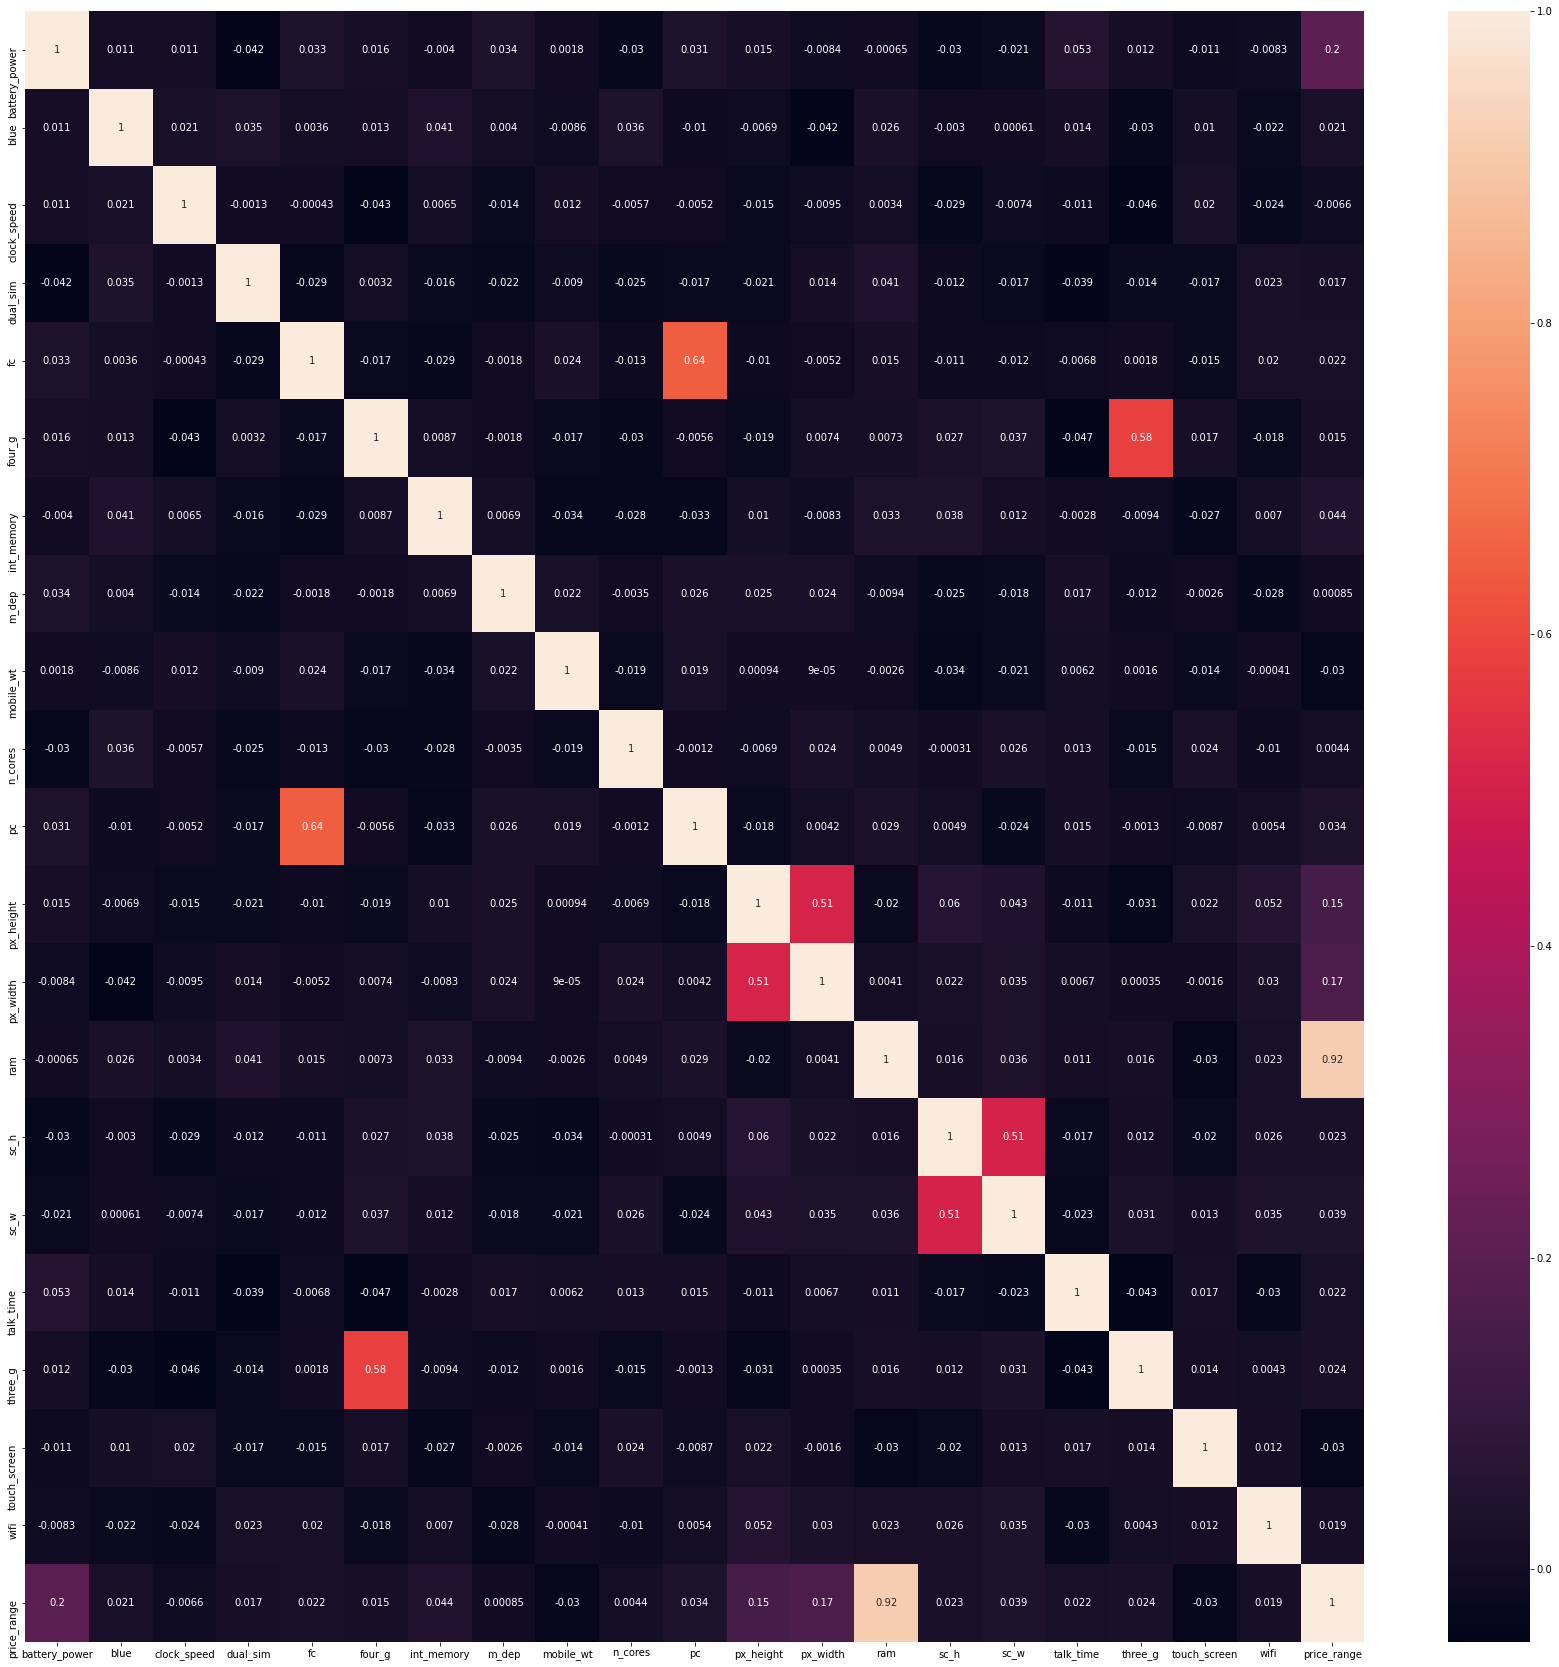

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

#### (Four_g, three_g) & (pc, fc) are correlated so we can drop one of them

#### We write the function which loops all the values of matric of correlation and then if value of correlation for matrix i,j postion then we append the matrix column at i and return the list of columns

correlation() function returns the columns which cn be dropped as they are having correlation higher than given threshold value

In [11]:
threshold = 0.6

# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
correlation(df.iloc[:,:-1], threshold)

{'pc'}

### We can drop above columns

# 1.3 Information gain / Mutual information

- Information gain calculates the reduction in entropy from the transformation of a dataset.

- It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

- It simply find out dependency of two variables here they are feature and target variable, and score indicates which feature is important.

- Values ranges from 0-1 higher is better and that variable selected.

 We can use **SelectKBest** with **mutual_info_classif** as function

In [ ]:
from sklearn.feature_selection import mutual_info_classif
def select_features_mutual_info_classification(features, target):
    mutual_info = mutual_info_classif(features, target)
    mutual_data=pd.Series(mutual_info,index = features.columns)
    return mutual_data.sort_values(ascending=False)

top_features = select_features_mutual_info_classification(x, y)
top_features

In [ ]:
def select_features_mutual_info_regression(features, target):
    mutual_info = mutual_info_regression(features, target)
    mutual_data=pd.Series(mutual_info,index = features.columns)
    return mutual_data.sort_values(ascending=False)

top_features = select_features_mutual_info_regression(x, y)
top_features

# 1.4 Variance Threshold (Check tendency of Constant values)

- The variance threshold is a simple baseline approach to feature selection. 

- It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

- We assume that features with a higher variance may contain more useful information, but note that we are **not taking the relationship between feature variables or feature and target** variables into account, which is one of the drawbacks of filter methods. But due to same reason **it can be used for Unsupervised Leanrning**

- The get_support returns a Boolean vector where True means that the variable does not have atleast threshold variance.

In [15]:
from sklearn.feature_selection import VarianceThreshold

v_threshold = VarianceThreshold(threshold=0.5)
v_threshold.fit(x)
v_threshold.get_support()


array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [16]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [17]:
x.columns[v_threshold.get_support()]

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time'],
      dtype='object')

### Values with TRUE says variance met  threshold condistion and FALSE means varience does not meats the threshold condition and it is tending towards constant values as variance is low, so this columns can be dropped.

# 2. Wrapper methods

1. **Forward Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.
2. **Backward Elimination** : In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.
3. **Exhaustive Feature Selection**: This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

# 2.1 Forward feature selection
Iterative method, we find best performing variable which gives maximum score when alone fitted in model and then we try to fit another variable along with first best variable this way we find best combinations of features

In [18]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Sequential Feature Selector

SequentialFeatureSelector(
    **estimator**,
    **k_features** = 1,
    **forward** = True,
    **floating** = False,
    **verbose** = 0,
    *scoring**  =None,
    **cv** = 5,
    **n_jobs** = 1,
    **pre_dispatch** = '2*n_jobs',
    **clone_estimator** = True,
    **fixed_features** = None,
)
   
Sequential Feature Selection for Classification and Regression.

### Parameters


1. **estimator** : scikit-learn classifier or regressor.

2. **k_features** : int or tuple or str (default: 1)
   - Number of features to select,
   - where k_features < the full feature set.
   - If "best" is provided, the feature selector will return the feature subset with the best cross-validation performance.
   - If "parsimonious" is provided as an argument, the smallest feature subset that is within one standard error of the cross-validation performance will be selected.

3. **forward** : bool (default: True)
   - Forward selection if True,
   -  backward selection otherwise

4. **floating** : bool (default: False)
    Adds a conditional exclusion/inclusion if True.

5. **verbose** : int (default: 0), level of verbosity to use in logging.
    If 0, no output,
    if 1 number of features in current set, if 2 detailed logging i
    ncluding timestamp and cv scores at step.
    
6. **scoring** : str, callable, or None (default: None)
    - If None (default), uses 'accuracy' for sklearn classifiers, and 'r2' for sklearn regressors.
   
    - {accuracy, f1, precision, recall, roc_auc} for classifiers,
    - {'mean_absolute_error', 'mean_squared_error'/'neg_mean_squared_error','median_absolute_error', 'r2'} for regressors.

7. **cv** : int (default: 5)
    Integer or iterable yielding train, test splits. If cv is an integer and `estimator` is a classifier (or y consists of integer class labels) stratified k-fold. Otherwise regular k-fold cross-validation is performed. No cross-validation if cv is None, False, or 0.

8. **n_jobs** : int (default: 1)
    The number of CPUs to use for evaluating different feature subsets
    in parallel. -1 means 'all CPUs'.

9. **pre_dispatch** : int, or string (default: '2*n_jobs')
    Controls the number of jobs that get dispatched
    during parallel execution if `n_jobs > 1` or `n_jobs=-1`.
    Reducing this number can be useful to avoid an explosion of
    memory consumption when more jobs get dispatched than CPUs can process.
    This parameter can be:
    - None, in which case all the jobs are immediately created and spawned.
        Use this for lightweight and fast-running jobs,
        to avoid delays due to on-demand spawning of the jobs
    - An int, giving the exact number of total jobs that are spawned
    - A string, giving an expression as a function
        of n_jobs, as in `2*n_jobs`
10. **clone_estimator** : bool (default: True)
     - Clones estimator if True; works with the original estimator instance if False.
    - Set to False if the estimator doesn't implement scikit-learn's set_params and get_params methods.
    - In addition, it is required to set cv=0, and n_jobs=1.
11. **fixed_features** : tuple (default: None)
   -  If not `None`, the feature indices provided as a tuple will be
    regarded as fixed by the feature selector. For example, if
    `fixed_features=(1, 3, 7)`, the 2nd, 4th, and 8th feature are
    guaranteed to be present in the solution. Note that if
    `fixed_features` is not `None`, make sure that the number of
    features to be selected is greater than `len(fixed_features)`.
    In other words, ensure that `k_features > len(fixed_features)`.
    New in mlxtend v. 0.18.0.

Attributes
----------
1. **k_feature_idx_** : array-like, shape = [n_predictions]
    Feature Indices of the selected feature subsets.

2. **k_feature_names_** : array-like, shape = [n_predictions]
    Feature names of the selected feature subsets. If pandas
    DataFrames are used in the `fit` method, the feature
    names correspond to the column names. Otherwise, the
    feature names are string representation of the feature
    array indices. 

3. **k_score_** : float
    Cross validation average score of the selected subset.
subsets_ : dict
    A dictionary of selected feature subsets during the  sequential selection, where the dictionary keys are the lengths k of these feature subsets. The dictionary values are dictionaries themselves with the following
    keys: 
    - 'feature_idx' (tuple of indices of the feature subset)
    - 'feature_names' (tuple of feature names of the feat. subset)
    - 'cv_scores' (list individual cross-validation scores)
    - 'avg_score' (average cross-validation score)

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
# We use different model than regression the one we are actually gonna implement

lr = LinearRegression()

ffs = SequentialFeatureSelector(lr,  k_features=4, forward=True, n_jobs=-1)

ffs= ffs.fit(x,y)

features=list(ffs.k_feature_names_)

features

['battery_power', 'px_height', 'px_width', 'ram']

# 2.1 Backward feature selection

This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next,We Eliminate one variable and check the performance this is tried for every variable and whichever combination gives best result is continued and one variable is eliminated, this is continued until required conditions are met.

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
# We use different model than regression the one we are actually gonna implement

lr = LinearRegression()

ffs = SequentialFeatureSelector(lr,  k_features=4, forward=False, n_jobs=-1)

ffs= ffs.fit(x,y)

features=list(ffs.k_feature_names_)

features

['battery_power', 'px_height', 'px_width', 'ram']

# 2.3 Exhaustive Feature Selection

Exhaustive Feature Selection tries each every combination of variables and figure out which one is best and hence it is brute force method.



In [ ]:
import warnings
warnings.filterwarnings("ignore")

from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

efs = ExhaustiveFeatureSelector(rf, min_features=4, max_features=8, scoring='roc_auc')

efs.fit(x,y)

features = list(efs.best_idx_)